In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

In [3]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   STATION                   3529 non-null   int64 
 1   DATE                      3529 non-null   object
 2   REPORT_TYPE               3529 non-null   object
 3   HourlyDryBulbTemperature  3529 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 110.4+ KB


In [4]:
temperatures

0       52
1       51
2       52
3       49
4       43
        ..
3524    60
3525    59
3526    58
3527    58
3528    58
Name: HourlyDryBulbTemperature, Length: 3529, dtype: int64

In [5]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = st.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=57, count=327)


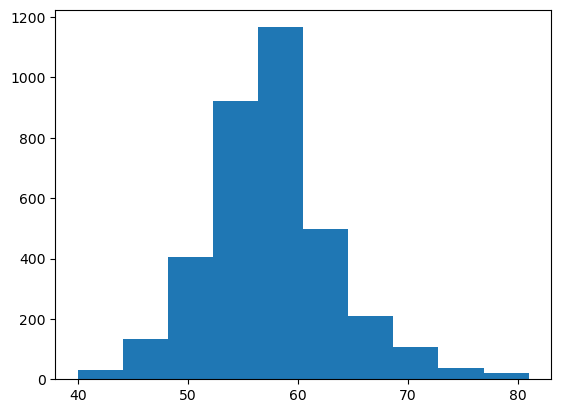

In [13]:
plt.hist(temperatures, bins=10)
plt.show()

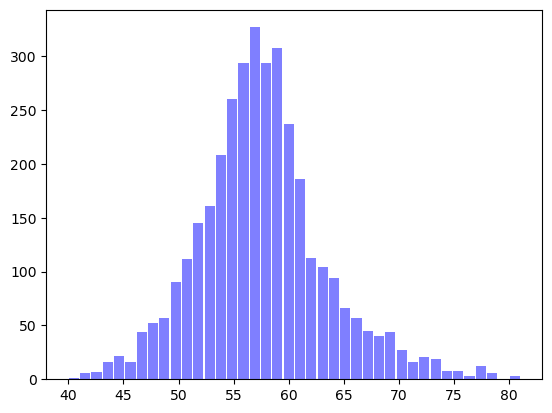

In [14]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures, bins=40,color='blue',alpha=0.5,rwidth=.9)
plt.show()

In [18]:
print(st.normaltest(temperatures.sample(50)))

NormaltestResult(statistic=1.566105646019553, pvalue=0.45700871282377253)


In [19]:
# Run the normality test on the whole temperatures DataFrame
print(st.normaltest(temperatures.sample(3529)))


NormaltestResult(statistic=202.53753937770153, pvalue=1.0460010849583278e-44)


In [20]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")



The population variance using the NumPy module is 32.33077618382955
The population standard deviation using the NumPy module is 5.686015844493361


In [26]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Approx. 68.2% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")



Approx. 68.2% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


In [22]:
temperatures.describe()

count    3529.000000
mean       57.655143
std         5.686822
min        40.000000
25%        54.000000
50%        57.000000
75%        60.000000
max        81.000000
Name: HourlyDryBulbTemperature, dtype: float64

In [23]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0      -0.994570
1      -1.170440
2      -0.994570
3      -1.522181
4      -2.577401
          ...   
3524    0.412390
3525    0.236520
3526    0.060650
3527    0.060650
3528    0.060650
Name: HourlyDryBulbTemperature, Length: 3529, dtype: float64


<Axes: >

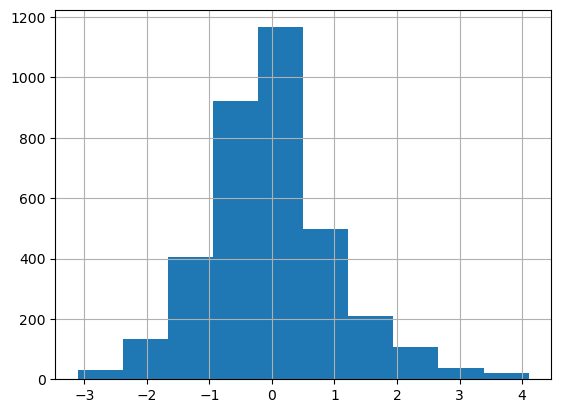

In [24]:
z_scipy.hist()